In [10]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
# Ruta del dataset
extracted_dir = r"C:\Users\alexa\OneDrive\Desktop\ML- proyecto\DataSet"
classes = os.listdir(extracted_dir)
images = []
labels = []

In [12]:
# Cargar imágenes y etiquetas
for i, sign_class in enumerate(classes):
    class_dir = os.path.join(extracted_dir, sign_class)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if os.path.isfile(image_path):
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (32, 32))
                images.append(image)
                labels.append(i)

images = np.array(images)
labels = np.array(labels)

In [13]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Expande las dimensiones de los datos de entrada
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Normalización de los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
# Realizar aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [15]:
# Definir el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [16]:
# Entrenar el modelo con aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    steps_per_epoch=len(X_train) // 32, 
                    epochs=30, 
                    validation_data=(X_test, y_test))

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Precisión en el conjunto de prueba:", test_accuracy)

Epoch 1/30
44/44 [==============================] - 2s 33ms/step - loss: 3.1727 - accuracy: 0.0701 - val_loss: 3.1593 - val_accuracy: 0.1061
Epoch 2/30
44/44 [==============================] - 2s 40ms/step - loss: 3.1530 - accuracy: 0.0966 - val_loss: 3.1151 - val_accuracy: 0.1061
Epoch 3/30
44/44 [==============================] - 2s 38ms/step - loss: 3.1125 - accuracy: 0.1009 - val_loss: 3.0538 - val_accuracy: 0.1313
Epoch 4/30
44/44 [==============================] - 2s 40ms/step - loss: 3.0915 - accuracy: 0.1080 - val_loss: 3.0146 - val_accuracy: 0.1620
Epoch 5/30
44/44 [==============================] - 1s 33ms/step - loss: 3.0430 - accuracy: 0.1295 - val_loss: 2.9546 - val_accuracy: 0.1676
Epoch 6/30
44/44 [==============================] - 2s 36ms/step - loss: 2.9753 - accuracy: 0.1423 - val_loss: 2.8647 - val_accuracy: 0.1899
Epoch 7/30
44/44 [==============================] - 1s 31ms/step - loss: 2.8791 - accuracy: 0.1660 - val_loss: 2.7556 - val_accuracy: 0.2151
Epoch 8/30
44

In [18]:
# Visualización de una imagen del dataset
pic = Image.open(r"C:\Users\alexa\OneDrive\Desktop\ML- proyecto\DataSet\A\IMG_0001.JPG")

pic = pic.convert("L")
pic = pic.resize((32, 32))
pic_arr = np.array(pic) / 255.0
pic_arr = np.expand_dims(pic_arr, axis=0)
prediction = model.predict(pic_arr)
predicted_class = np.argmax(prediction)

print("Predicción:", predicted_class)

predicted_class_name = classes[predicted_class]
print("Clase predicha:", predicted_class_name)

1/1 [==============================] - 0s 78ms/step
Predicción: 0
Clase predicha: A


<class 'PIL.JpegImagePlugin.JpegImageFile'>


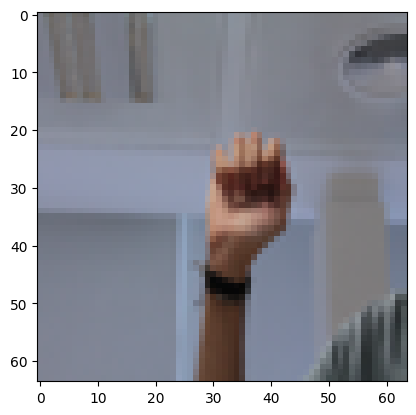

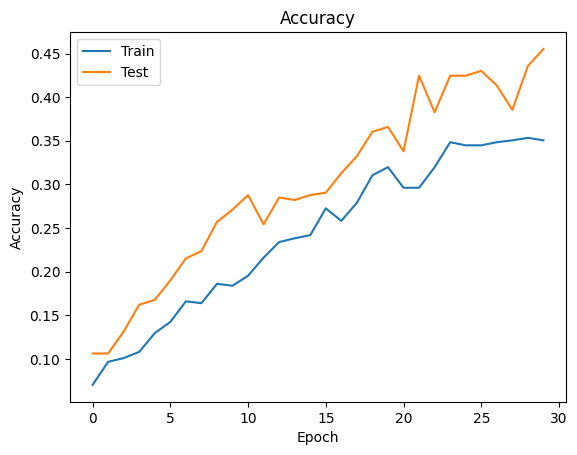

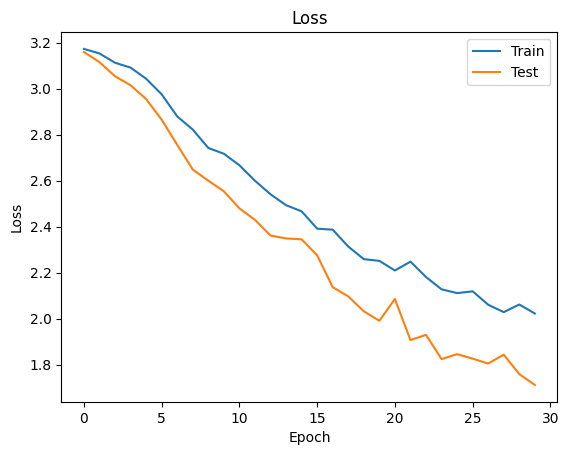

In [21]:
# Visualización de una imagen dentro del dataset
k = 2
pic = Image.open("C:/Users/alexa/OneDrive/Desktop/ML- proyecto/DataSet/A/IMG_0001.JPG")
pix = np.array(pic)
print(type(pic))

plt.imshow(pic.resize((32 * k, 32 * k)))
plt.show()

# Gráfico para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Gráfico para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
